# TF data presentation

Presenting datasets for Andreas' MSc thesis project about truck factor analyses.

# Prerequisites

This notebook uses various external libraries. In this section, we also define all helper functions.

In [2]:
# Import libraries and configure this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets

In [42]:
codescene_open = pd.read_csv('./data/truck_factor__summary__oss.csv', sep=',', decimal=".")
codescene_open.describe()

,project_id,job_id,authors,active_authors,entities,commits
count,1528.000000,1.528000e+03,1528.000000,1528.000000,1528.000000,1528.000000
mean,36254.617147,1.068927e+06,89.433901,7.392670,2027.846204,3001.500000
std,5193.909581,3.090101e+05,380.958148,27.070313,8539.441284,12543.183548
min,2477.000000,7.711180e+05,0.000000,0.000000,0.000000,0.000000
25%,34523.750000,8.626395e+05,2.000000,1.000000,20.750000,25.000000
50%,35955.000000,9.320420e+05,2.000000,1.000000,103.000000,39.000000
75%,38203.250000,1.167353e+06,18.000000,3.000000,502.750000,524.250000
max,46542.000000,1.800533e+06,9285.000000,558.000000,215537.000000,242005.000000


In [43]:
codescene_closed = pd.read_csv('./data/truck_factor__summary.csv', sep=',', decimal=".")
codescene_closed.describe()

,project_id,job_id,authors,active_authors,entities,commits
count,673.000000,6.730000e+02,673.000000,673.000000,673.000000,673.000000
mean,35180.545319,1.269581e+06,92.985141,10.967311,3411.484398,5271.830609
std,7777.762889,3.651754e+05,1093.007540,94.189962,19080.872539,43287.896532
min,87.000000,7.736510e+05,0.000000,0.000000,0.000000,0.000000
25%,34110.000000,8.986340e+05,2.000000,1.000000,33.000000,25.000000
50%,36113.000000,1.176613e+06,2.000000,1.000000,103.000000,39.000000
75%,39684.000000,1.727521e+06,13.000000,4.000000,635.000000,588.000000
max,45454.000000,1.729039e+06,19895.000000,1709.000000,256575.000000,740965.000000


## Remove invalid entries

Projects cannot have 0 authors.

In [44]:
# a project cannot have 0 authors
codescene_open_valid = codescene_open[codescene_open['authors'] > 0]
codescene_open_valid.describe()

,project_id,job_id,authors,active_authors,entities,commits
count,1504.000000,1.504000e+03,1504.000000,1504.000000,1504.000000,1504.000000
mean,36200.525931,1.063904e+06,90.861037,7.510638,2060.205452,3049.396277
std,5147.187848,3.053055e+05,383.818686,27.269335,8603.474325,12637.150799
min,2477.000000,7.711180e+05,1.000000,1.000000,1.000000,1.000000
25%,34520.750000,8.626062e+05,2.000000,1.000000,24.000000,25.000000
50%,35936.000000,9.296950e+05,2.000000,1.000000,103.000000,39.000000
75%,38134.250000,1.161549e+06,19.000000,3.000000,521.500000,551.250000
max,46542.000000,1.800533e+06,9285.000000,558.000000,215537.000000,242005.000000


In [46]:
# a project cannot have 0 authors
codescene_closed_valid = codescene_closed[codescene_closed['authors'] > 0]
codescene_closed_valid.describe()

,project_id,job_id,authors,active_authors,entities,commits
count,670.000000,6.700000e+02,670.000000,670.000000,670.000000,670.000000
mean,35202.811940,1.270416e+06,93.401493,11.016418,3426.759701,5295.435821
std,7755.416308,3.657475e+05,1095.437712,94.398044,19122.236224,43383.403259
min,87.000000,7.736510e+05,1.000000,1.000000,1.000000,1.000000
25%,34116.500000,8.986025e+05,2.000000,1.000000,37.250000,26.000000
50%,36103.500000,1.176619e+06,2.000000,1.000000,103.000000,39.000000
75%,39729.750000,1.727535e+06,13.000000,4.000000,638.000000,608.250000
max,45454.000000,1.729039e+06,19895.000000,1709.000000,256575.000000,740965.000000


## Filter outliers

Projects with either less than 100 entities or 100 commits are not interesting.

In [69]:
codescene_open_filtered = codescene_open_valid[(codescene_open_valid['entities'] > 100) & (codescene_open_valid['commits'] > 100)]
codescene_open_filtered.describe()

,project_id,job_id,authors,active_authors,entities,commits
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,35691.600000,1.125136e+06,265.498000,19.852000,5854.554000,9052.836000
std,6579.132422,3.527169e+05,630.715452,44.802954,13860.669675,20660.250083
min,2477.000000,7.711180e+05,1.000000,1.000000,101.000000,103.000000
25%,33799.750000,8.526378e+05,15.000000,2.000000,490.750000,514.250000
50%,35955.500000,9.572275e+05,77.500000,5.500000,1357.500000,2456.500000
75%,40294.500000,1.275647e+06,254.500000,18.000000,6812.250000,10353.500000
max,46542.000000,1.800533e+06,9285.000000,558.000000,215537.000000,242005.000000


In [70]:
codescene_closed_filtered = codescene_closed_valid[(codescene_closed_valid['entities'] > 100) & (codescene_closed_valid['commits'] > 100)]
codescene_closed_filtered.describe()

,project_id,job_id,authors,active_authors,entities,commits
count,250.0000,2.500000e+02,250.000000,250.000000,250.000000,250.00000
mean,31412.5560,1.399385e+06,246.064000,27.308000,8909.776000,14122.86800
std,9524.6584,3.620752e+05,1785.137007,153.343242,30541.272752,70227.97442
min,175.0000,7.736510e+05,1.000000,1.000000,111.000000,103.00000
25%,27716.2500,1.031509e+06,10.000000,3.000000,461.750000,446.25000
50%,33035.0000,1.663730e+06,23.000000,6.000000,1203.000000,1396.50000
75%,38230.5000,1.728042e+06,59.000000,14.000000,4048.000000,5375.50000
max,45409.0000,1.729039e+06,19895.000000,1709.000000,256575.000000,740965.00000


## Plot authors

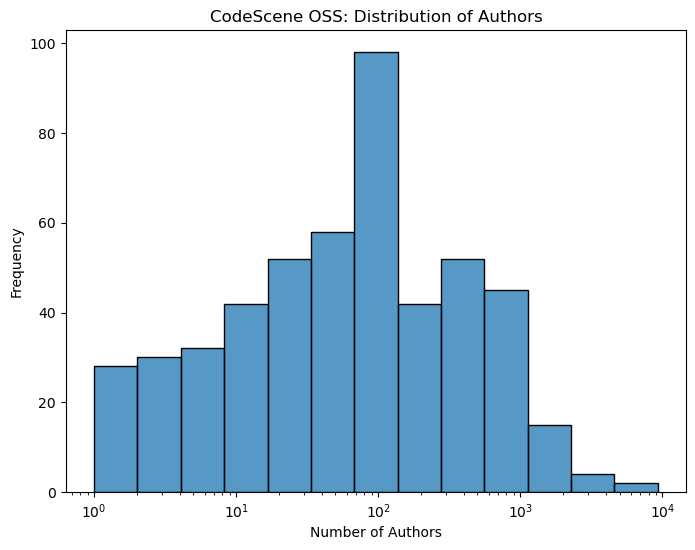

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_open_filtered['authors'], kde=False, log_scale=True)
plt.title('CodeScene OSS: Distribution of Authors')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.show()

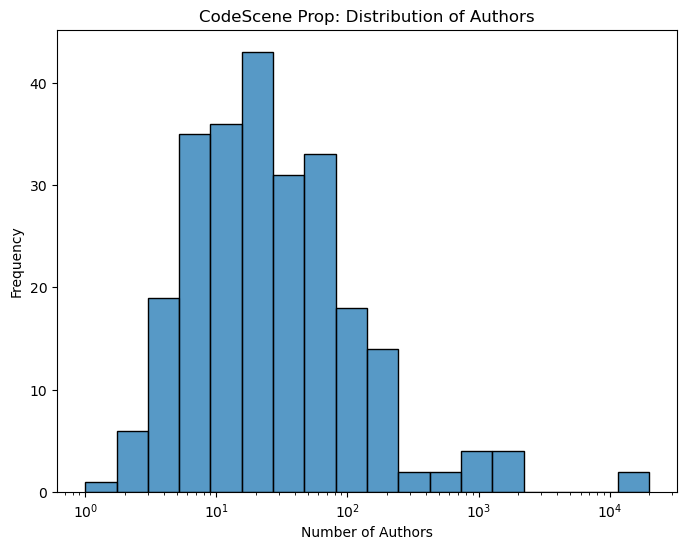

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_closed_filtered['authors'], kde=False, log_scale=True)
plt.title('CodeScene Prop: Distribution of Authors')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.show()

## Plot entities

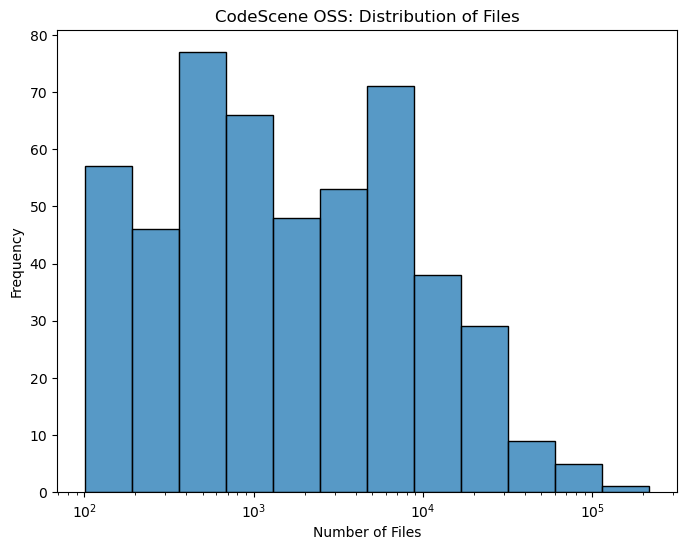

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_open_filtered['entities'], kde=False, log_scale=True)
plt.title('CodeScene OSS: Distribution of Files')
plt.xlabel('Number of Files')
plt.ylabel('Frequency')
plt.show()

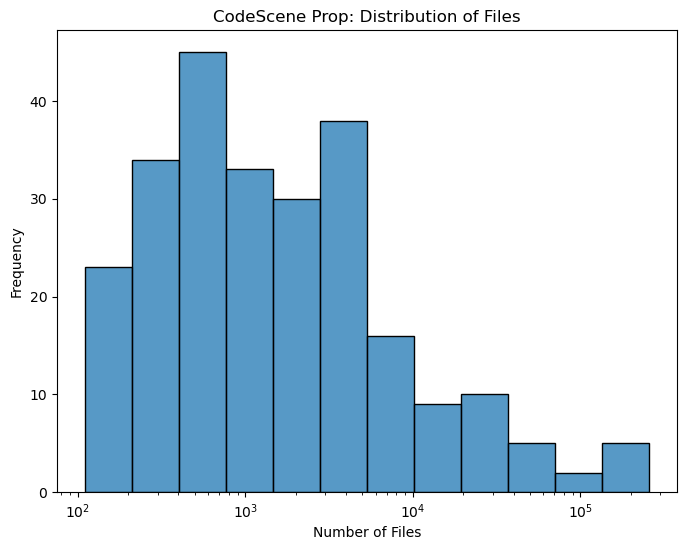

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_closed_filtered['entities'], kde=False, log_scale=True)
plt.title('CodeScene Prop: Distribution of Files')
plt.xlabel('Number of Files')
plt.ylabel('Frequency')
plt.show()

## Plot commits

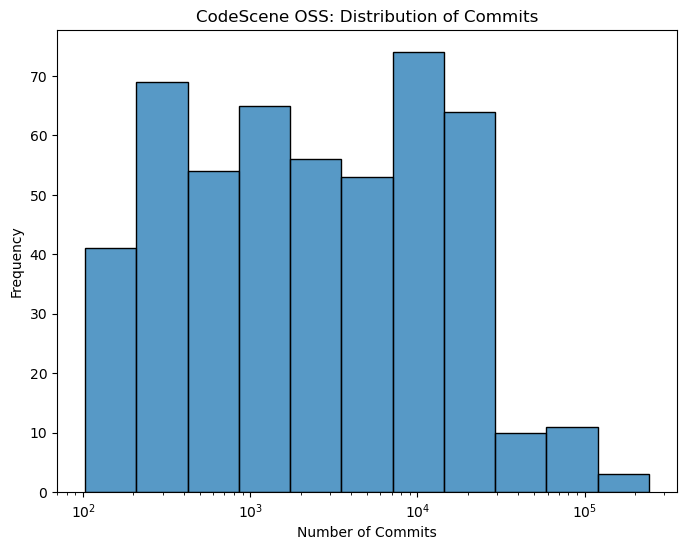

In [86]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_open_filtered['commits'], kde=False, log_scale=True)
plt.title('CodeScene OSS: Distribution of Commits')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

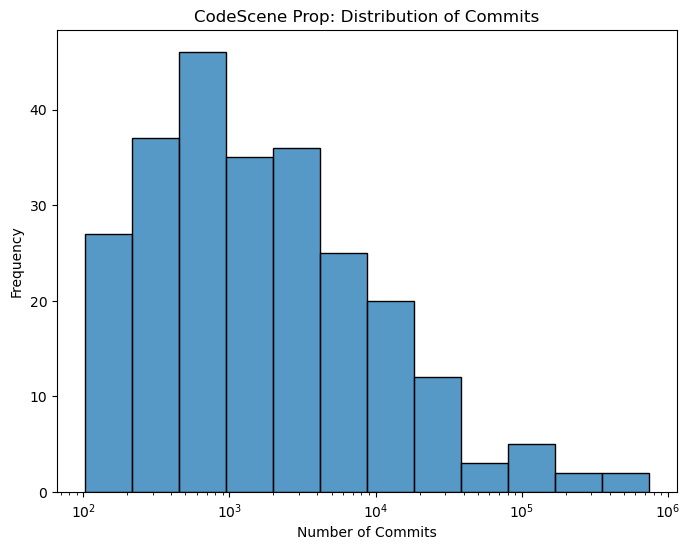

In [87]:
plt.figure(figsize=(8, 6))
sns.histplot(codescene_closed_filtered['commits'], kde=False, log_scale=True)
plt.title('CodeScene Prop: Distribution of Commits')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()